In [11]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [36]:
class Perceptron:
    
    def __init__(self, n_x:int) -> None:
        self.n_x = n_x
        self.W = np.random.rand(n_x + 1, 1) # +1 adds bias
        
    def activation_function(self, z): # sign function
        a = z.copy()
        a[z>0] = 1
        a[a<=0] = -1
        return a
    
    def loss_function(self, y_hat, y):
        return 0.5*(y - y_hat)
    
    def add_bias(self, X):
        m = X.shape[1]
        ones = np.ones((1, m))
        return np.vstack([ones, X])
    
    def update_weights(self, X, loss, lr):
        X = self.add_bias(X)
        self.W = self.W + X*loss*lr
    
    def call(self, X):
        X = self.add_bias(X)
        return self.W.T@X        
        
    def predict(self, X):
        z = self.call(X)
        return self.activation_function(z)
    
    def fit(self, X, Y, epochs=1000, lr=0.01):
        print(f'Starting train for {epochs} epochs \n')
        for epoch in tqdm(range(epochs)):
            for el_idx in range(X.shape[1]):
                X_i = X[:, el_idx].reshape((self.n_x, -1))
                y_i = Y[el_idx]
                z = self.call(X)
                a = self.activation_function(z)
                loss = np.mean(self.loss_function(a, y_i))
                self.update_weights(X_i, loss, lr)        

In [5]:
def calculate_boundary(W, X = np.arange(-1, 1, 0.1)):
    b, w1, w2 = W
    m = -(b / w2) / (b / w1)
    y = [m*x + (-b / w2) for x in X]
    return X, y

In [6]:
# generate dataset for test
x1 = np.random.rand(2, 20)
y1 = np.ones(20)

x2 = -1*np.random.rand(2, 20)
y2 = -1*np.ones(20)

X_train = np.hstack([x1, x2])
y_train = np.hstack([y1, y2])

In [39]:
# random initialization
perceptron = Perceptron(n_x=2)

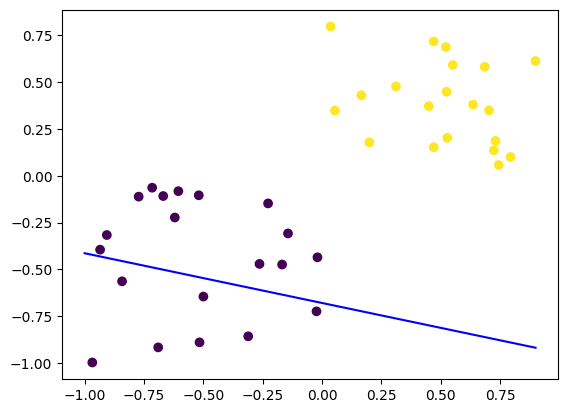

In [40]:
# random initialization plot
X, y = calculate_boundary(perceptron.W)
plt.scatter(X_train[0], X_train[1], c=y_train)
plt.plot(X, y, color='blue')
plt.show()

In [41]:
perceptron.fit(X_train, y_train)

Starting train for 1000 epochs 



100%|██████████| 1000/1000 [00:02<00:00, 355.24it/s]


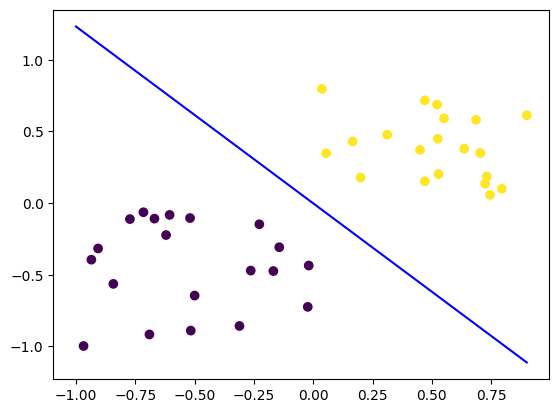

In [42]:
# random initialization plot
X, y = calculate_boundary(perceptron.W)
plt.scatter(X_train[0], X_train[1], c=y_train)
plt.plot(X, y, color='blue')
plt.show()